In [6]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))




(28, 28)
784
Epoch 1/10
235/235 [==============================] - 7s 28ms/step - loss: 0.2883 - accuracy: 0.9105 - val_loss: 0.1719 - val_accuracy: 0.9448
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0995 - accuracy: 0.9697 - val_loss: 0.0904 - val_accuracy: 0.9713
Epoch 3/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0981 - val_accuracy: 0.9700
Epoch 4/10
235/235 [==============================] - 7s 31ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0830 - val_accuracy: 0.9724
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0297 - accuracy: 0.9903 - val_loss: 0.0605 - val_accuracy: 0.9817
Epoch 6/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0605 - val_accuracy: 0.9823
Epoch 7/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0168 - accuracy: 0.9949 - val_loss: 0.0676 - val_acc

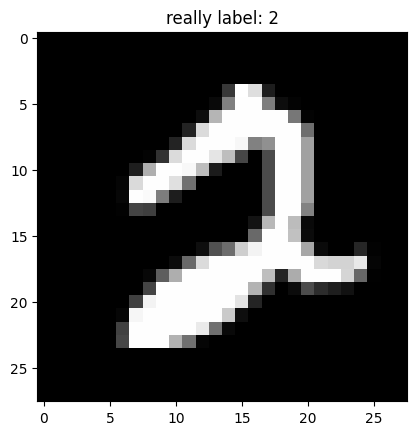

1/1 [==============================] - 0s 25ms/step
predict label: 2


In [8]:
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(test_data) - 1)
image = test_data[index]
label = test_labels[index]

image = image.reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"really label: {label}")
plt.show()

predictions = model.predict(np.array([test_data[index]]))
predicted_label = np.argmax(predictions)

print(f"predict label: {predicted_label}")